# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('/Users/arjunkhanchandani/Desktop/Uni/6th Semester/AI Applications (UCS655)/NLP in Python/corpus.pkl')
data

,transcript,full_name
brennan,[gentle music playing] [audience applauding] [...,Neal Brennan
burnham,"Exploring mental health decline over 2020, the...",Bo Burnham
burr,"Recorded Live at the Royal Albert Hall, London...",Bill Burr
carlin,"Recorded on January 12–13, 1990, State Theatre...",George Carlin
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
louis,Recorded at the Madison Square Garden on Augus...,Louis C.K.
murphy,After achieving fame with Saturday Night Live ...,Eddie Murphy
norm,"Then people go, “Goddamn, at least he’s not a ...",Norm Macdonald
pete,"So, Louis C.K. tried to get me fired from SNL ...",Pete Davidson


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
brennan,[gentle music playing] [audience applauding] [...,Neal Brennan,0.113204,0.517706
burnham,"Exploring mental health decline over 2020, the...",Bo Burnham,0.037319,0.519463
burr,"Recorded Live at the Royal Albert Hall, London...",Bill Burr,-0.015969,0.517474
carlin,"Recorded on January 12–13, 1990, State Theatre...",George Carlin,0.038451,0.510631
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle,-0.007415,0.522439
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086064,0.462008
louis,Recorded at the Madison Square Garden on Augus...,Louis C.K.,0.058751,0.562946
murphy,After achieving fame with Saturday Night Live ...,Eddie Murphy,-0.015016,0.538857
norm,"Then people go, “Goddamn, at least he’s not a ...",Norm Macdonald,0.107565,0.533172
pete,"So, Louis C.K. tried to get me fired from SNL ...",Pete Davidson,0.056519,0.581201


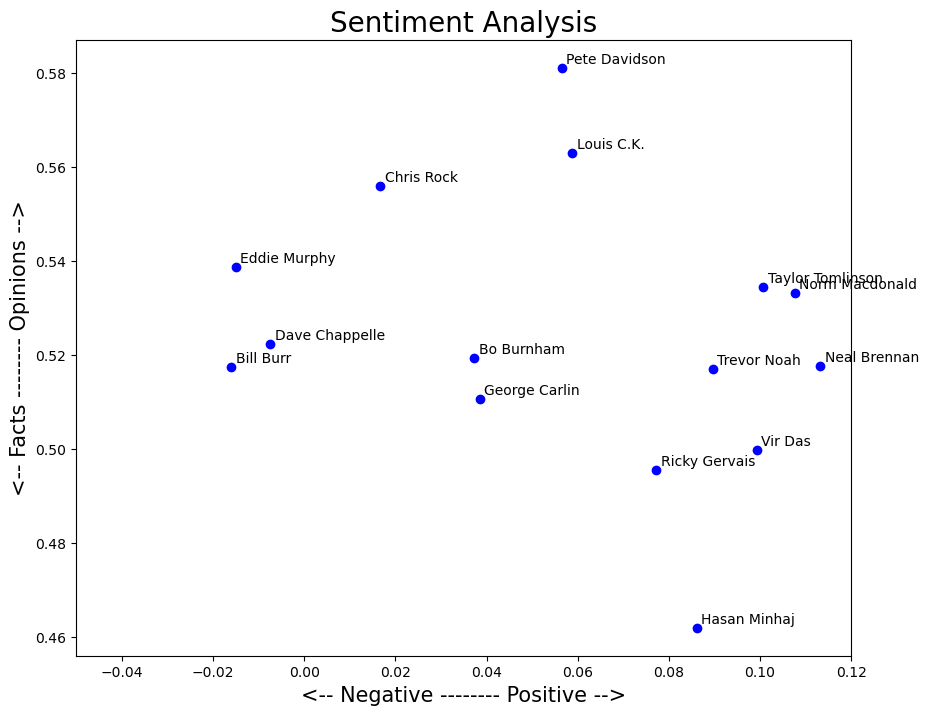

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.05, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
brennan,[gentle music playing] [audience applauding] [...,Neal Brennan,0.113204,0.517706
burnham,"Exploring mental health decline over 2020, the...",Bo Burnham,0.037319,0.519463
burr,"Recorded Live at the Royal Albert Hall, London...",Bill Burr,-0.015969,0.517474
carlin,"Recorded on January 12–13, 1990, State Theatre...",George Carlin,0.038451,0.510631
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle,-0.007415,0.522439
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086064,0.462008
louis,Recorded at the Madison Square Garden on Augus...,Louis C.K.,0.058751,0.562946
murphy,After achieving fame with Saturday Night Live ...,Eddie Murphy,-0.015016,0.538857
norm,"Then people go, “Goddamn, at least he’s not a ...",Norm Macdonald,0.107565,0.533172
pete,"So, Louis C.K. tried to get me fired from SNL ...",Pete Davidson,0.056519,0.581201


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [7]:
# The list has 15 elements, one for each transcript
len(list_pieces)

15

In [8]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.17144326866549087,
  0.05884692792587529,
  0.03348307876609762,
  0.12646455026455028,
  0.024724157955865276,
  0.20535037878787876,
  0.07636183261183259,
  0.01947016460905349,
  0.2622649894389025,
  0.11772053083528491],
 [0.0837834216910304,
  0.012435064935064936,
  0.014401387827858417,
  0.01237088367685383,
  0.1235914085914086,
  -0.2125336538461539,
  0.05466167355371898,
  0.11374882557918274,
  0.2150519344387269,
  0.046043650793650796],
 [0.013653203678185503,
  -0.10242824782359103,
  -0.05214494747205025,
  -0.01000317095729329,
  -0.0015104252783289332,
  -0.0008720154728558162,
  -0.016070827320827336,
  -0.07368198149448149,
  0.050521119906295854,
  0.016084054834054826],
 [0.04405303030303031,
  0.13740738428238428,
  0.11464412464412464,
  -0.024757424475166406,
  -0.04000850340136054,
  -0.018738977072310415,
  0.18631439107629585,
  -0.07698657274928461,
  -0.02168949232585596,
  0.021279761904761912],
 [0.12784381663113006,
  -0.06946103492278867,
  0.06

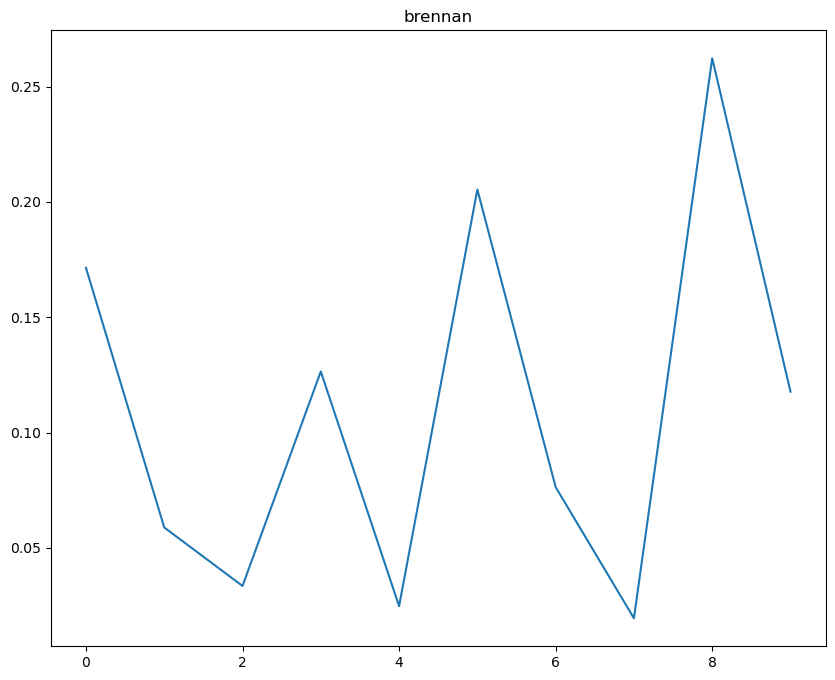

In [10]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

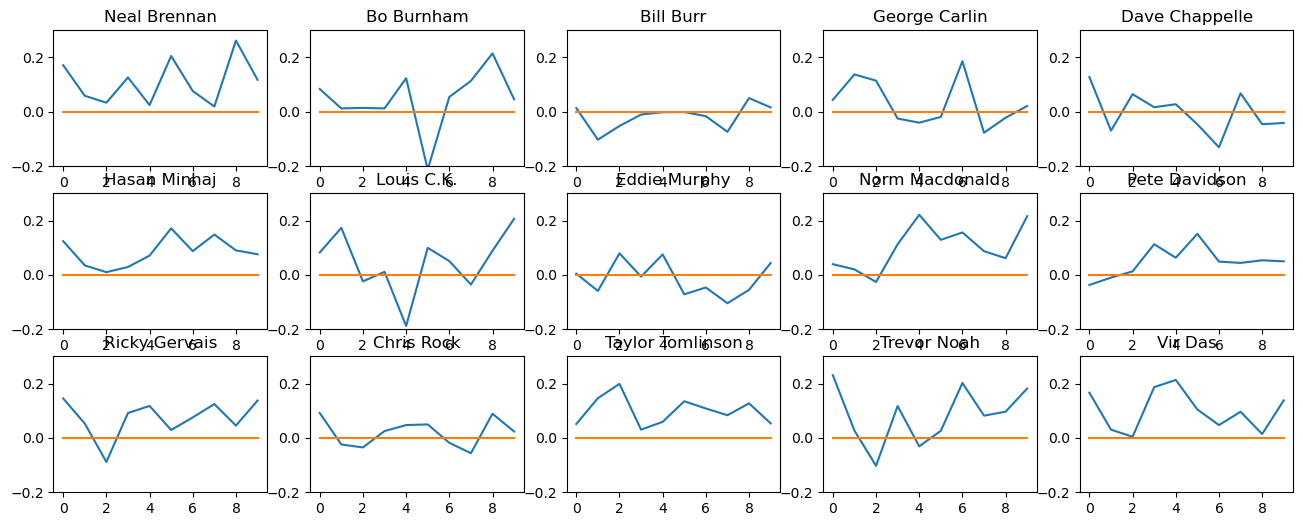

In [11]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 6]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian according to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian according to Polarity and Subjectivity.
